In [6]:
############################get packages and define functions#################
from obspy import read
import obspy
import obspy.signal.filter
import obspy.signal.invsim
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates 
from scipy import optimize as op
from scipy import signal
import re
from obspy import Trace, Stream
from obspy.core import UTCDateTime
import obspy.signal.freqattributes
from os import path
import glob
import matplotlib.colors as colors

def position(Number): 
    r = re.compile("([a-zA-Z]+)([0-9]+)")
    m = r.match(Number)
    num = int(m.group(2)) 
    with open('Sensor_coordinates.txt') as f:
        lines = f.readlines()
    line = lines[num-119]
    line =line.replace("  "," ")
    line =line.replace("  "," ")
    line =line.replace("  "," ")
    y = int(line.split(' ')[5])
    x = int(line.split(' ')[4])
    return x,y



# Show the setup of the transdusers

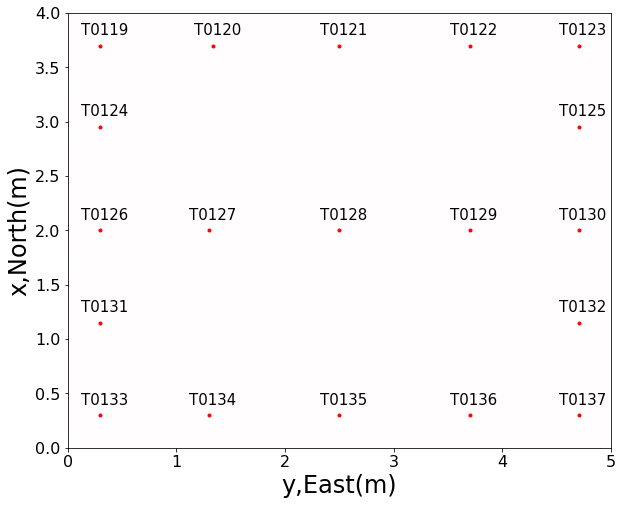

In [7]:
####################show the setup of the transdusers#################
fig, axs = plt.subplots(1,1,figsize=(10, 8))
for i in np.arange(19):
    EMB = 'T0'+str(i+119) 
    plt.scatter(position(EMB)[1]/1000,position(EMB)[0]/1000,c = 'r',marker = '.')
    axs.annotate(EMB, (position(EMB)[1]/1000-0.18,position(EMB)[0]/1000+0.1),fontsize= 15)    
axs = plt.imshow(np.zeros((500,400)), extent=[0,5,0,4],aspect=1., origin='lower',cmap='seismic',vmax=0.1, vmin=-0.1)
plt.ylabel('x,North(m)',fontsize= 24)
plt.xlabel('y,East(m)',fontsize= 24)     
plt.tick_params(axis='both', labelsize=16)

# read the processed data from the the concrete experiment

trace.stats.network: name of the source sensor<br>
trace.stats.station: name of the receiver sensor

In [13]:
processed_D = []
processed_S = []
for source in np.arange(19):
    for station in np.arange(19):
        if source != station:
            tr_d = read("./processed_data/envelope_"+'Src'+str(int(source+119))+'_'+'Sta'+str(int(station+119)) + ".sac")  
            tr_s = read("./processed_data/wavelet_"+'Src'+str(int(source+119))+'_'+'Sta'+str(int(station+119)) + ".sac")  
            processed_D.append(tr_d[0])
            processed_S.append(tr_s[0])
t = np.arange(0,processed_D[0].stats.delta*processed_D[0].stats.npts,processed_D[0].stats.delta)*1000 #ms

# plot the trace

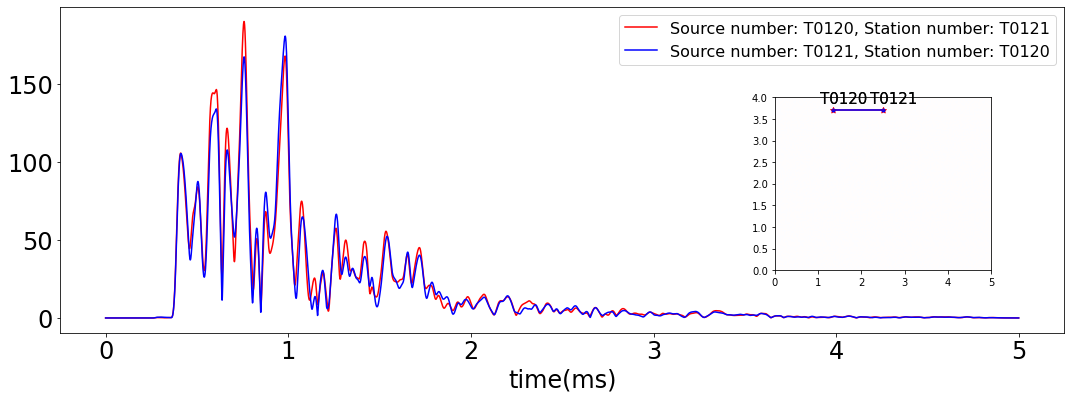

In [20]:
Source_1 = 120
Station_1 = 121


############
Source_2 = Station_1
Station_2 = Source_1    
for i in np.arange(len(processed_D)):
    if processed_D[i].stats.network == 'T0'+str(int(Source_1)) and processed_D[i].stats.station == 'R0'+str(int(Station_1)):
        y_real_1 = processed_D[i].data
    if processed_D[i].stats.network == 'T0'+str(int(Source_2)) and processed_D[i].stats.station == 'R0'+str(int(Station_2)):
        y_real_2 = processed_D[i].data

Source_1 = 'T0'+str(int(Source_1))
Source_2 = 'T0'+str(int(Source_2))
Station_1 = 'T0'+str(int(Station_1))
Station_2 = 'T0'+str(int(Station_2))

if Source_1 == Station_2 and Source_2 == Station_1:
    fig,ax = plt.subplots(figsize=(18, 6))
    ax.set_xlabel('time(ms)',fontsize=24)
    ax.tick_params(axis='both', labelsize=24)
    plt.plot(t,y_real_1,'-r',label = 'Source number: %s, Station number: %s'%(Source_1,Station_1))
    plt.plot(t,y_real_2,'-b',label = 'Source number: %s, Station number: %s'%(Source_2,Station_2))
    #plt.plot(t,(y_real_1+y_real_2)/2,c = 'r',label = 'Average')
    #ax.set_title('Frequency band: %s-%sHz'%(freq_min,freq_max),fontsize=24)
    plt.legend(prop={'size': 16})
    ax2 = fig.add_axes([0.6, 0.27, 0.32, 0.4])
    for EMB in [Source_1, Source_2]:
        ax2.scatter(position(EMB)[1]/1000,position(EMB)[0]/1000,c = 'r',marker = '*')
        ax2.annotate(EMB, (position(EMB)[1]/1000-0.3,position(EMB)[0]/1000+0.15),fontsize= 15)
    for EMB in [Station_1, Station_2]:
        ax2.scatter(position(EMB)[1]/1000,position(EMB)[0]/1000,c = 'b',marker = '.')
        ax2.annotate(EMB, (position(EMB)[1]/1000-0.3,position(EMB)[0]/1000+0.15),fontsize= 15)    
    ax2.imshow(np.zeros((500,400)), extent=[0,5,0,4],aspect=1., origin='lower',cmap='seismic',vmax=0.1, vmin=-0.1)
    ax2.plot([position(Source_1)[1]/1000,position(Station_1)[1]/1000],[position(Source_1)[0]/1000,position(Station_1)[0]/1000],'r-')
    ax2.plot([position(Source_2)[1]/1000,position(Station_2)[1]/1000],[position(Source_2)[0]/1000,position(Station_2)[0]/1000],'b-')


